In [1]:
from data_processing import *
from classification_processing import *

In [2]:
# Required packages
import pickle

## Patch classification

In [3]:
# Load data
with open('annotated_data.pkl', 'rb') as f:
    annotated = pickle.load(f)
with open('validation_set.pkl', 'rb') as f:
    validation_set = pickle.load(f)
with open('test_set.pkl', 'rb') as f:
    test_set = pickle.load(f)

#### Assess patch classification performance and train model

In [4]:
# Prepare data to be fed to sklearn. Metadata contains patient_id
X_annotated, y_annotated, metadata_annotated = create_X_y(annotated, patch_level=True) 
X_validation, y_validation, metadata_validation = create_X_y(validation_set, patch_level=True)
X_test, y_test, metadata_test = create_X_y(test_set, patch_level=True)

In [5]:
# Define estimators

estimators = [
        ('SVM', SVC(gamma='auto', random_state=0)),
        ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
        ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)),
        ('Gaussian Naive Bayes', GaussianNB())       
    ]   

CLASSIFIER USED: SVM


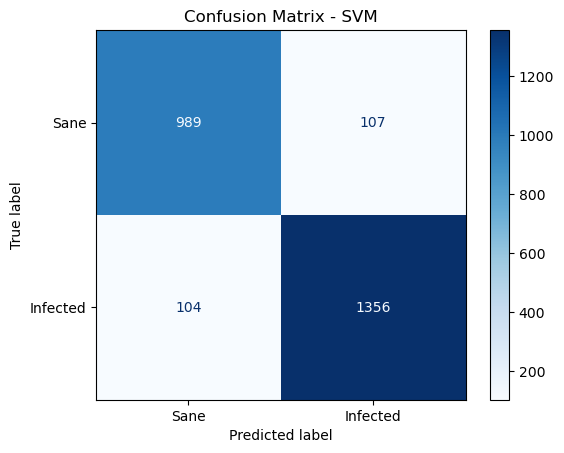

Classification Report:
              precision    recall  f1-score   support

        Sane       0.90      0.90      0.90      1096
    Infected       0.93      0.93      0.93      1460

    accuracy                           0.92      2556
   macro avg       0.92      0.92      0.92      2556
weighted avg       0.92      0.92      0.92      2556



CLASSIFIER USED: Random Forest


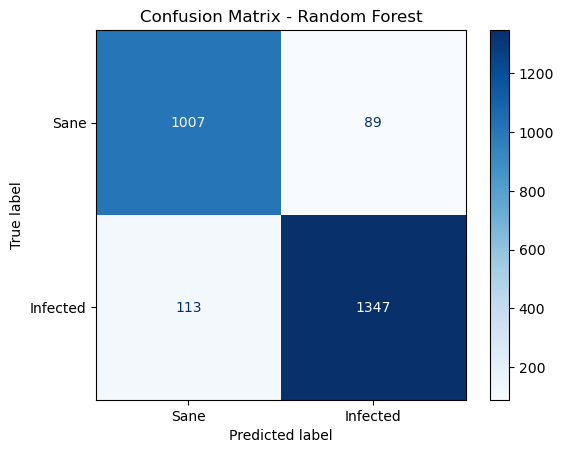

Classification Report:
              precision    recall  f1-score   support

        Sane       0.90      0.92      0.91      1096
    Infected       0.94      0.92      0.93      1460

    accuracy                           0.92      2556
   macro avg       0.92      0.92      0.92      2556
weighted avg       0.92      0.92      0.92      2556



CLASSIFIER USED: Gradient Boosting


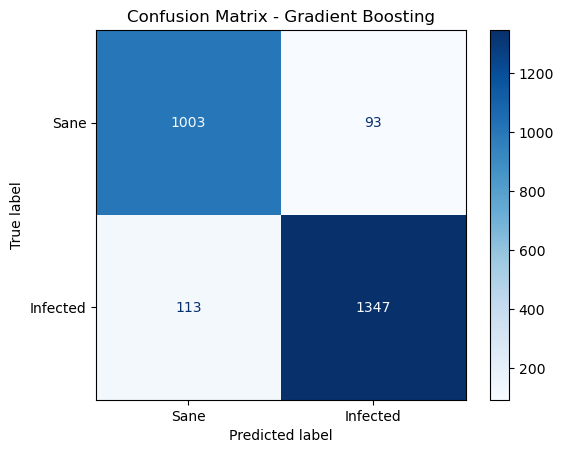

Classification Report:
              precision    recall  f1-score   support

        Sane       0.90      0.92      0.91      1096
    Infected       0.94      0.92      0.93      1460

    accuracy                           0.92      2556
   macro avg       0.92      0.92      0.92      2556
weighted avg       0.92      0.92      0.92      2556



CLASSIFIER USED: Gaussian Naive Bayes


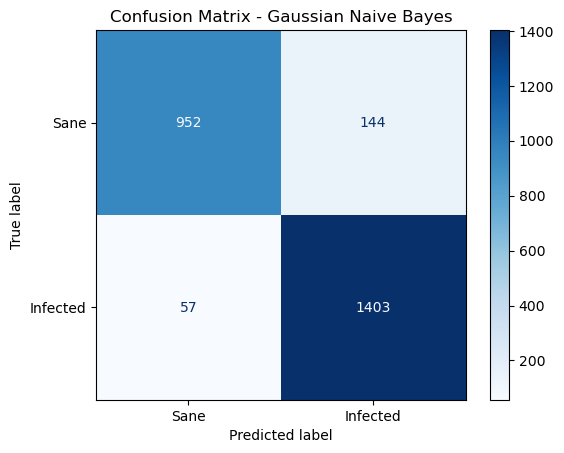

Classification Report:
              precision    recall  f1-score   support

        Sane       0.94      0.87      0.90      1096
    Infected       0.91      0.96      0.93      1460

    accuracy                           0.92      2556
   macro avg       0.93      0.91      0.92      2556
weighted avg       0.92      0.92      0.92      2556



CLASSIFIER USED: Voting


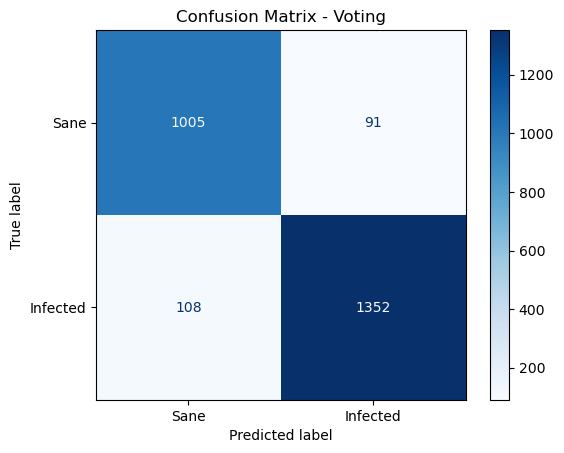

Classification Report:
              precision    recall  f1-score   support

        Sane       0.90      0.92      0.91      1096
    Infected       0.94      0.93      0.93      1460

    accuracy                           0.92      2556
   macro avg       0.92      0.92      0.92      2556
weighted avg       0.92      0.92      0.92      2556





In [6]:
# Perform corss-validation over annotated set with different estimators
explore_estimators(X_annotated, y_annotated, estimators)

In [7]:
# Create the voting classifier which performed better, based on `explore_estimators`
vote =  VotingClassifier(estimators=estimators, voting='hard')

In [8]:
# Fit the voting classifier so that we can perform inference
vote_fit = inference_pass(annotated, X_annotated, y_annotated, metadata_annotated, vote, train=True, patch_level=True)

# Predict the label of all the unlabelled patches
inference_pass(validation_set, X_validation, y_validation, metadata_validation, vote_fit, patch_level=True)
inference_pass(test_set, X_test, y_test, metadata_test, vote_fit, patch_level=True)

#### Create patient's features and classify

In [9]:
add_patient_features(validation_set)
add_patient_features(test_set)

In [10]:
X_validation, y_validation, metadata_validation = create_X_y(validation_set)
X_test, y_test, metadata_test = create_X_y(test_set)

In [11]:
# Define classifiers
estimators = [     
    ('Random Forest', RandomForestClassifier(max_depth=10, random_state=0)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, max_depth=20, random_state=0)),
    ('KNN', KNeighborsClassifier(n_neighbors=10))
] 

CLASSIFIER USED: Random Forest


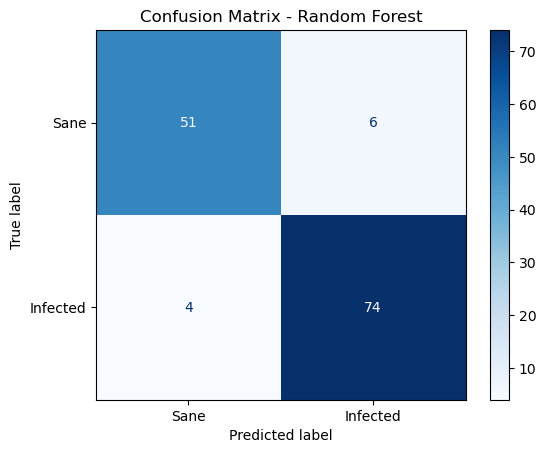

Classification Report:
              precision    recall  f1-score   support

        Sane       0.93      0.89      0.91        57
    Infected       0.93      0.95      0.94        78

    accuracy                           0.93       135
   macro avg       0.93      0.92      0.92       135
weighted avg       0.93      0.93      0.93       135



CLASSIFIER USED: Gradient Boosting


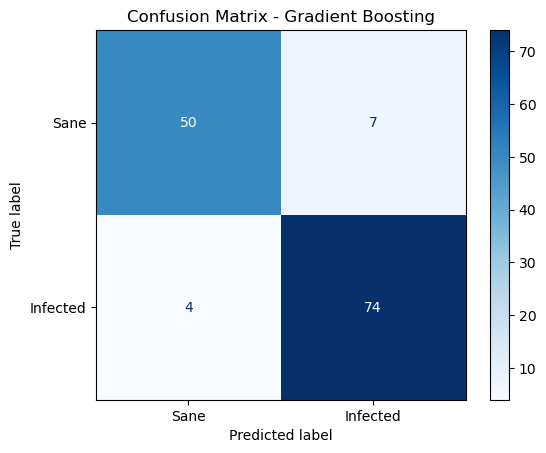

Classification Report:
              precision    recall  f1-score   support

        Sane       0.93      0.88      0.90        57
    Infected       0.91      0.95      0.93        78

    accuracy                           0.92       135
   macro avg       0.92      0.91      0.92       135
weighted avg       0.92      0.92      0.92       135



CLASSIFIER USED: KNN


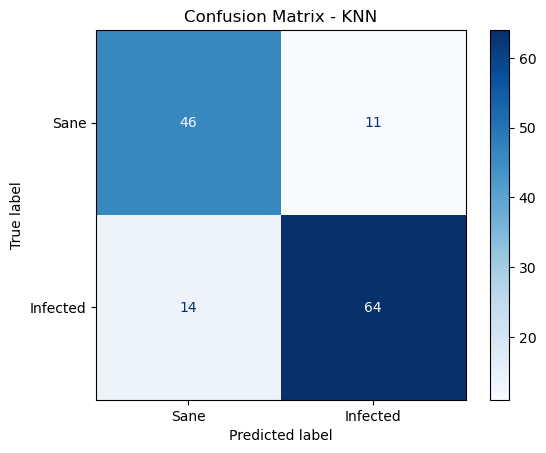

Classification Report:
              precision    recall  f1-score   support

        Sane       0.77      0.81      0.79        57
    Infected       0.85      0.82      0.84        78

    accuracy                           0.81       135
   macro avg       0.81      0.81      0.81       135
weighted avg       0.82      0.81      0.82       135



CLASSIFIER USED: Voting


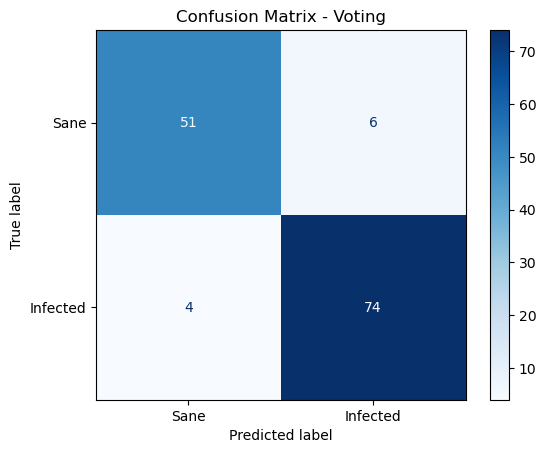

Classification Report:
              precision    recall  f1-score   support

        Sane       0.93      0.89      0.91        57
    Infected       0.93      0.95      0.94        78

    accuracy                           0.93       135
   macro avg       0.93      0.92      0.92       135
weighted avg       0.93      0.93      0.93       135





In [12]:
explore_estimators(X_validation, y_validation, estimators)

CLASSIFIER USED: Voting


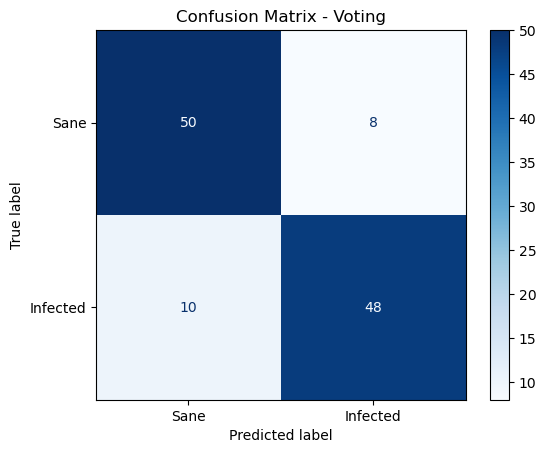

Classification Report:
              precision    recall  f1-score   support

        Sane       0.83      0.86      0.85        58
    Infected       0.86      0.83      0.84        58

    accuracy                           0.84       116
   macro avg       0.85      0.84      0.84       116
weighted avg       0.85      0.84      0.84       116



CLASSIFIER USED: Voting


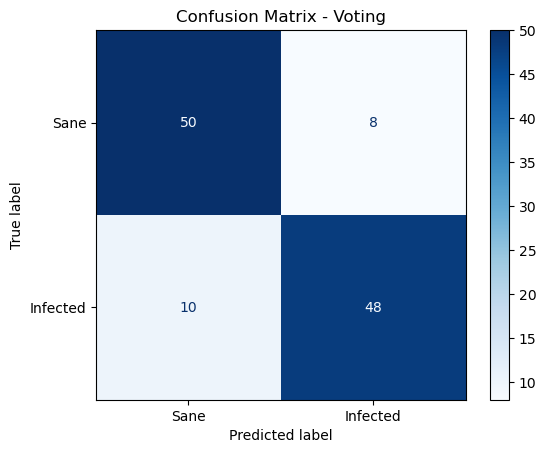

Classification Report:
              precision    recall  f1-score   support

        Sane       0.83      0.86      0.85        58
    Infected       0.86      0.83      0.84        58

    accuracy                           0.84       116
   macro avg       0.85      0.84      0.84       116
weighted avg       0.85      0.84      0.84       116





In [13]:
# Assess patient classification over unseen data
voter =  VotingClassifier(estimators=estimators, voting='soft')
explore_estimators(X_test, y_test, [('Voting', voter)])

In [14]:
# Save datasets
with open('annotated_data.pkl', 'wb') as f:
    pickle.dump(annotated, f)
with open('validation_set.pkl', 'wb') as f:
    pickle.dump(validation_set, f)
with open('test_set.pkl', 'wb') as f:
    pickle.dump(test_set, f)